#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Project 2. Unsupervised Learning with Recommender Systems </span>

<p align="center" style="display: block; max-width: 100%;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Lastfm_logo.svg" style="max-width: 25%; height: auto;">
</p>


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Introduction </span>
<div style="text-align: justify;">

Recommender systems are capable of providing consumers with tailored suggestions, pointing them toward products they are likely to appreciate but would not have discovered on their own, by examining trends in their behavior, interests, and interactions. These systems are essential for raising engagement in the world of music streaming and discovery services such as Last.fm. In order to match listeners with music that suits their likes, the aim of this project is to construct a **recommender system** that combs through the enormous database of songs, artists, and genres based on information of listener history utilizing detailed user interactions and artist information to predict and influence future listens.

A common technique used to provide recommendations based on the user community is **Collaborative Filtering**. This method is distinguished by two main approaches:

- **Memory-Based**: calculates similarities between items or users based on historical data.

- **Model-Based**: involves constructing complex algorithms to predict user preferences. These models can handle large datasets efficiently and are adept at uncovering latent factors that influence listening preferences.

Nonetheless, for an understanding of users' listening likes and behaviors in this context, listening counts are an essential measure. In contrast to explicit ratings, where users directly rate their preferences on a scale, listening counts are an example of **Implicit Feedback**. By recording the frequency of engagement with various artists, they offer insights into user behavior, but they do not indicate the level of preference. This type of data offers valuable insights into user behavior—indicating preference through the frequency of interactions with artists. A high listening count implies a user's affinity for an artist, while the absence of listening activity doesn't necessarily indicate dislike it could simply mean the user has yet to discover the artist.

The combination of listening counts, artist popularity, user-generated tags, and the rich set of artist attributes in this dataset provides a comprehensive foundation for creating a music recommender system making use of complex models capable of interpreting these implicit signals:

- **Bayesian Personalized Ranking (BPR)**: the goal is to rank content by predicting user preferences based on implicit feedback.

- **Weighted Matrix Factorization (WMF)**: enhances traditional matrix factorization by incorporating the confidence level associated with implicit interactions.

- **Factorization Machines (FM)**: can handle sparse data typical of implicit feedback scenarios.

</div>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Exploratory Data Analysis </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> Data Tables </span>
<div style="text-align: justify;">

**Artists Data:**

This table contains information about music artists listened to and tagged by the users.

* `artistID`: unique identifier for each artist.

* `name`: name of the artist.

* `freq`: how often the artist appears in the dataset.

* `listeners`: number of users who have listened to the artist.

**Tags Data:**

This table contains the set of tags or genres available.

* `tagID`: unique identifier for each tag.

* `tagValue`: name of the tag, which can represent a genre, mood, era, or any other music-related attribute.

**User-Artist Data Data:**

This table captures which artists users have listened to, including a count of listening events.

* `userID`: unique identifier for each user.

* `artistID`: artist listened to by the user.

* `weight`: count of how many times the user has listened to the artist, indicative of the user's preference strength for that artist.

**User-Tagged Artists Data**

This table contains the tags that users have assigned to artists, along with timestamps indicating when the tagging occurred.

* `userID`, `artistID`, `tagID`: identifiers linking users, artists, and tags.

* `day`, `month`, `year`: date when the tag was assigned, providing temporal context.


In [1]:
import pandas as pd 

artists = pd.read_csv('./hetrec2011-lastfm-2k/artists-v2.dat', header=0, sep='\t')
user_tag_artist = pd.read_csv('./hetrec2011-lastfm-2k/user_taggedartists.dat', header=0, sep='\t')
tags = pd.read_csv('hetrec2011-lastfm-2k/tags.dat', header=0, sep='\t', encoding='latin-1')
users = pd.read_csv('hetrec2011-lastfm-2k/user_artists.dat',header=0, sep='\t')


In [2]:
print("Artists Data:")
artists.head()

Artists Data:


,artistID,name,freq,listeners
0,89,Lady Gaga,611,3798959
1,289,Britney Spears,522,3243214
2,288,Rihanna,484,4542147
3,227,The Beatles,480,3658694
4,300,Katy Perry,473,3721531


In [3]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artistID   4562 non-null   int64 
 1   name       4562 non-null   object
 2   freq       4562 non-null   int64 
 3   listeners  4562 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 142.7+ KB


In [4]:
artists.isna().sum()

artistID     0
name         0
freq         0
listeners    0
dtype: int64

In [5]:
print("User-Tagged Artists Data:")
user_tag_artist.head()

User-Tagged Artists Data:


,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [6]:
user_tag_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186479 entries, 0 to 186478
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   userID    186479 non-null  int64
 1   artistID  186479 non-null  int64
 2   tagID     186479 non-null  int64
 3   day       186479 non-null  int64
 4   month     186479 non-null  int64
 5   year      186479 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


In [7]:
user_tag_artist.isna().sum()

userID      0
artistID    0
tagID       0
day         0
month       0
year        0
dtype: int64

In [8]:
print("Tags Data:")
tags.head()

Tags Data:


,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [9]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11946 entries, 0 to 11945
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tagID     11946 non-null  int64 
 1   tagValue  11946 non-null  object
dtypes: int64(1), object(1)
memory usage: 186.8+ KB


In [10]:
tags.isna().sum()

tagID       0
tagValue    0
dtype: int64

In [11]:
print("Users Data:")
users.head()

Users Data:


,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [12]:
users.isna().sum()

userID      0
artistID    0
weight      0
dtype: int64

In [13]:
users.value_counts('weight', normalize = True)

weight
1         0.006851
2         0.004513
4         0.003716
3         0.003641
5         0.003425
            ...   
4546      0.000011
4548      0.000011
4551      0.000011
4561      0.000011
352698    0.000011
Length: 5436, dtype: float64

In [14]:
n_users = users['userID'].nunique()
print("Unique User: ", n_users)
n_artists = users['artistID'].nunique()
print("Unique Artists: ", n_artists)

Unique user:  1892
Unique Artists:  17632


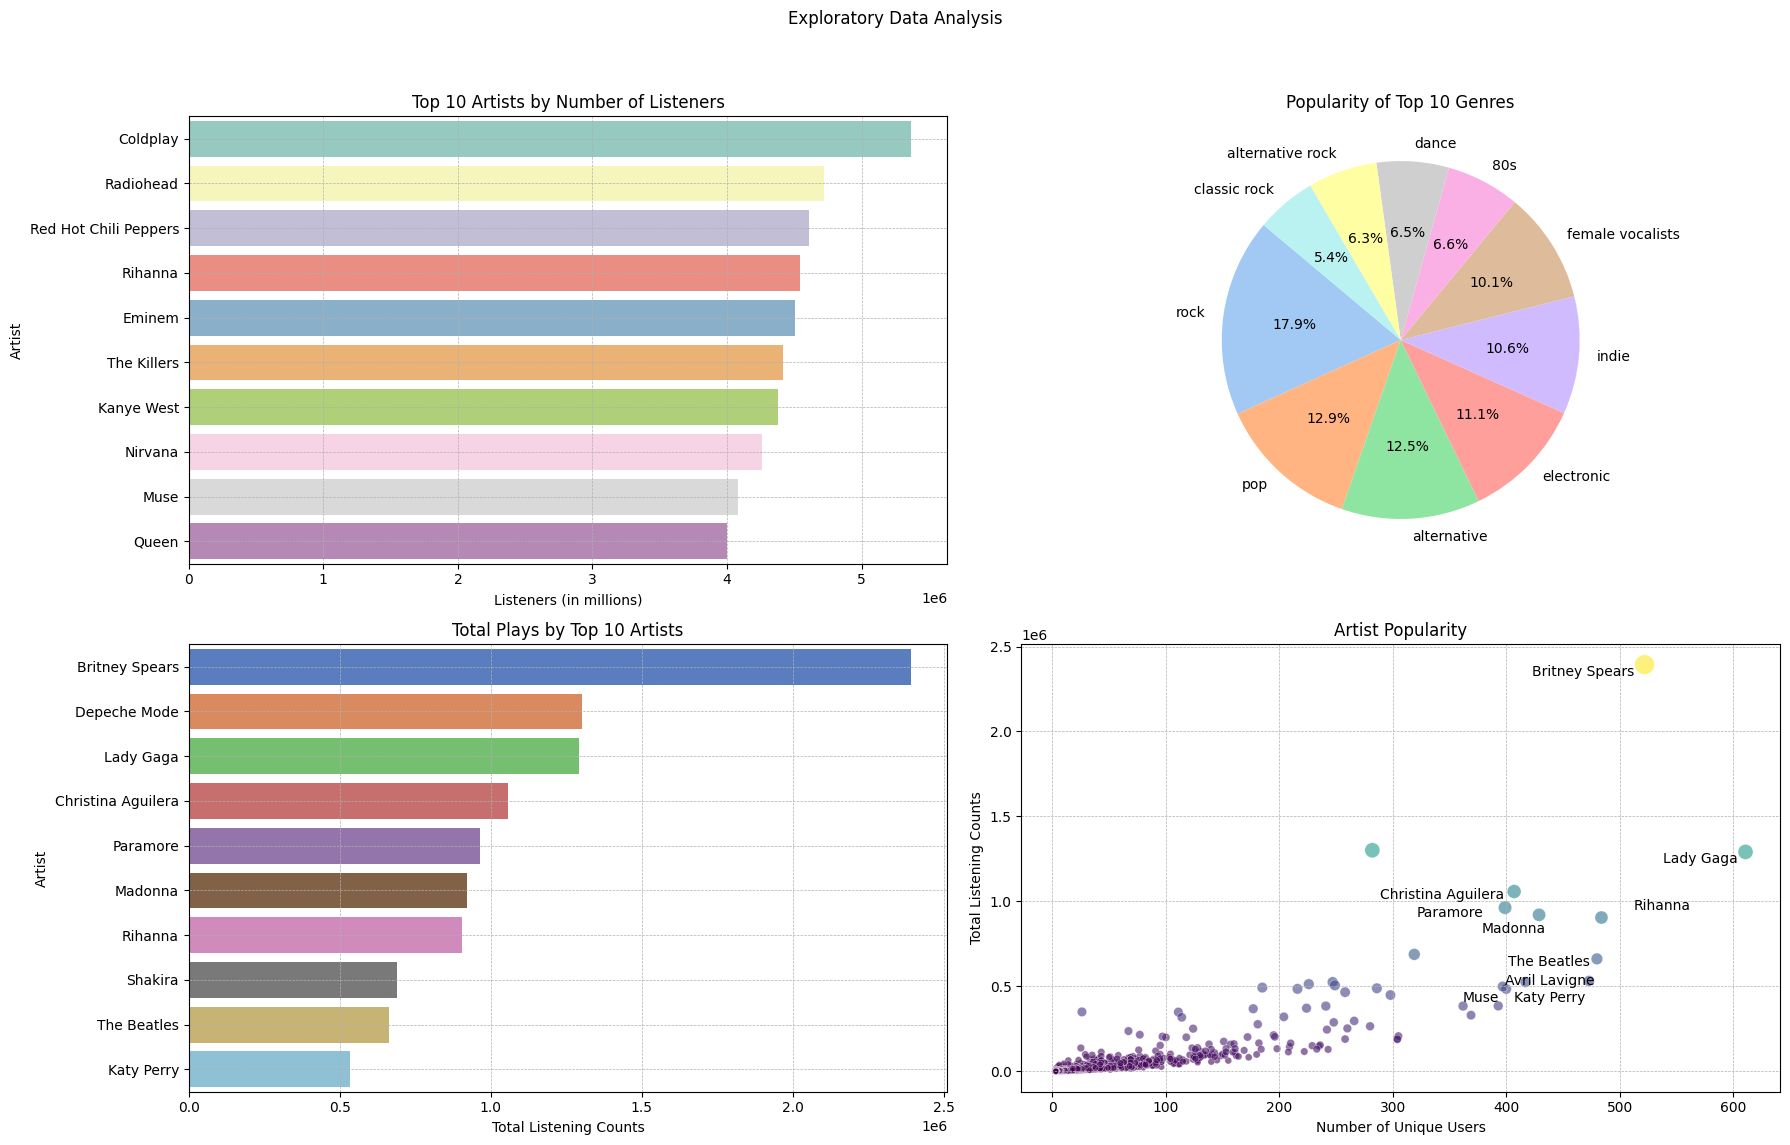

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
fig.suptitle('Exploratory Data Analysis')

# Popularity of Artists
top_artists = artists.sort_values(by = 'listeners', ascending = False).head(10)
sns.barplot(x = 'listeners', y = 'name', data = top_artists,  ax = axes[0, 0], palette = 'Set3')
axes[0, 0].set_title('Top 10 Artists by Number of Listeners')
axes[0, 0].set_xlabel('Listeners (in millions)')
axes[0, 0].set_ylabel('Artist')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Popularity of Genres
genre_counts = user_tag_artist.groupby('tagID').size().sort_values(ascending=False).head(10)
top_genres = pd.merge(genre_counts.reset_index(), tags, how = 'left', on = 'tagID')
axes[0, 1].pie(top_genres[0], labels = top_genres['tagValue'], autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette('pastel'))
axes[0, 1].set_title('Popularity of Top 10 Genres')

# Total Plays by Artist (Listening Counts)
total_plays_by_artist = users.groupby('artistID')['weight'].sum().sort_values(ascending=False).head(10)
top_artists_by_plays = pd.merge(total_plays_by_artist.reset_index(), artists, on = 'artistID')
sns.barplot(x = 'weight', y = 'name', data=top_artists_by_plays,  ax = axes[1, 0], palette = 'muted')
axes[1, 0].set_title('Total Plays by Top 10 Artists')
axes[1, 0].set_xlabel('Total Listening Counts')
axes[1, 0].set_ylabel('Artist')
axes[1, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Identifying the top 10 artists by popularity (considering both unique users and total listening counts)
artist_popularity = users.groupby('artistID').agg({'userID': pd.Series.nunique, 'weight': 'sum'})
artist_popularity = artist_popularity.merge(artists[['artistID', 'name']], on='artistID')
top_artists_by_popularity = artist_popularity.sort_values(by = ['userID', 'weight'], ascending = False).head(10)
sns.scatterplot(x = 'userID', y = 'weight', data = artist_popularity, size = 'weight', hue = 'weight', legend = False, alpha = 0.6, sizes = (20, 200),  ax = axes[1, 1], palette = 'viridis')
artist_names = []
for i, row in top_artists_by_popularity.iterrows():
    artist_names.append(plt.text(row['userID'], row['weight'], row['name']))
adjust_text(artist_names)
axes[1, 1].set_title('Artist Popularity')
axes[1, 1].set_xlabel('Number of Unique Users')
axes[1, 1].set_ylabel('Total Listening Counts')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

These visualizations offer a comprehensive picture of the popularity of different artists and genres within the dataset, as well as specific insights into the tastes and behavior of Last.fm users. Examining each graph in detail:

- **Top 10 Artists by Number of Listeners**: This barplot reveals the artists with the largest unique listener bases. The main takeaway from this is that these artists are popular with a wide range of user segments. The artists at the top of this list, like Coldplay, have effectively reached a large audience, which could make them excellent choices for broad-based recommendations. These artists are probably going to be well-liked by new listeners, based on their large listener numbers, which reflect a general popularity that goes beyond specialist interests.

- **Popularity of Top 10 Genres**: The most popular musical genres and characteristics are displayed in the genre popularity pie chart. Popular music genres on this chart, such pop, rock, and electronic music, are indicative of what most users in this streaming service like to listen to. It represents quite helpful information as it helps to figure out general musical trends, which makes it possible to provide suggestions based on genre that suit the tastes of most people. It also emphasizes how crucial tag-based categorization is for identifying user interests.

- **Total Plays by Top 10 Artists**: Artists with high listening counts demonstrate strong involvement as well as broad popularity when ranked by total plays. An artist like Britney Spears leading this chart suggests a dedicated fan base that listens to her music frequently. This distinction is important for recommendations since artists with a large number of plays may have a strong emotional connection with their audience and encourage return visits. Thus, suggests the possibility of fostering user loyalty and enduring interest. 

- **Artist Popularity**: This scatterplot combines the dimensions of unique listener counts and total plays to map out the landscape of artist popularity more comprehensively. It displays a range of artist profiles, from those with high unique users and total reproductions and to the ones that have lower listeners and total plays. Most importantly, it distinguishes between artists with a broad but perhaps shallower appeal (high unique users but lower plays per user) and those who, although having fewer listeners, induce high engagement (high plays but lower unique user counts). This perspective helps customize suggestions to match user preferences for breadth (new artists to discover) versus depth (artists they could get deeply engaged with).

</div>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Collaborative Filtering</span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 3.1. Memory Based Approach</span>

<div style="text-align: justify;">
 
In Collaborative Filtering, there are two key approaches: Memory-based approach and Model-based approach. The Memory-Based approach seeks to identify similar users based on Cosine Similarity or the Pearson correlation coefficient, and then takes the weighted average of the ratings.

There are two main types of neighborhood-based algorithms:

- **User Based**: In this scenario, ratings provided by users similar to a target user A are used to make recommendations for this user A. The predicted ratings for A are computed as the weighted average values of these ratings from the *peer group* for each item. Operations are calculated with a $m × n$ matrix $R = [r_{ij}]$ containing $m$ users and $n$ items. Before initiating this method, an approach is adopted whereby rows are compared, effectively comparing User 1 and User 2 as vectors. It is crucial to mention that to avoid penalizing any user, rather than standardization, normalization is applied.


- **Item Based**: To generate recommendations for a target item B, the initial step involves identifying a set $S$ of items that bear the closest resemblance to item B. Subsequently, to predict the rating of any user A for item B, the ratings within the set, as specified by A, are considered. The weighted average of these ratings is then used to estimate the predicted rating of user A for item B. This process is based on the principle that users who have shown a preference for items similar to B are likely to feel the same way about B itself.

While both Pearson correlation coefficient and Cosine Similarity are applied in the user-based approach, the item-based approach additionally incorporates the Adjusted Cosine metric.
</div>

In [9]:
import cornac
from cornac.eval_methods import RatioSplit
from cornac.models import ItemKNN
import numpy as np

In [17]:
# ItemKNN methods
VERBOSE = False
K = 50  # Number of nearest neighbors

iknn_cosine = ItemKNN(
  k = K, similarity = "cosine", name = "ItemKNN-Cosine", verbose=VERBOSE
)
iknn_pearson = ItemKNN(
  k = K, similarity = "pearson", name = "ItemKNN-Pearson", verbose=VERBOSE
)
iknn_pearson_mc = ItemKNN(
  k = K, similarity = "pearson", mean_centered = True, name = "ItemKNN-Pearson-MC", verbose = VERBOSE
)
iknn_adjusted = ItemKNN(
  k = K, similarity = "cosine", mean_centered = True, name = "ItemKNN-AdjustedCosine", verbose = VERBOSE
)

In [39]:
SEED = 42

feedback = users.astype({'userID':object, 'artistID':object, 'weight':object}).to_records(index = False)
ratio_split = RatioSplit(feedback, test_size=0.1, seed=SEED, verbose=VERBOSE)

cornac.Experiment(
  eval_method = ratio_split, 
  models = [iknn_cosine, iknn_pearson, iknn_pearson_mc, iknn_adjusted],
  metrics = [cornac.metrics.RMSE()],
).run()



TEST:
...
                       |      RMSE | Train (s) | Test (s)
---------------------- + --------- + --------- + --------
ItemKNN-Cosine         | 1082.4923 |    1.5851 |   0.3745
ItemKNN-Pearson        | 1042.9618 |    1.6283 |   0.3586
ItemKNN-Pearson-MC     | 1033.7617 |    1.6690 |   0.3574
ItemKNN-AdjustedCosine | 1034.7199 |    1.5711 |   0.3594



In [40]:
users_df = users.copy()  

users_df.columns = ["userID", "artistID", "weight"]

users_df.set_index("userID", inplace=True)

items_df = artists.copy() 

items_df.columns = ["artistID", "name", "freq", "listeners"]

items_df.set_index("artistID", inplace=True)


In [20]:
users_df.sort_values(by='userID', ascending=True)

,artistID,weight
userID,,
2,51,13883
2,78,2119
2,79,1990
2,80,1972
2,81,1948
...,...,...
2100,4271,2026
2100,4611,360
2100,4970,614


In [43]:
# User-item interaction matrix from the trained model
rating_mat = iknn_pearson_mc.train_set.matrix
# Dictionaries mapping the original user and item IDs to their respective indices in the interaction matrix
user_id2idx = iknn_pearson_mc.train_set.uid_map
item_id2idx = iknn_pearson_mc.train_set.iid_map
# Lists that allow mapping back from the internal user/item indices to their original IDs
user_idx2id = list(iknn_pearson_mc.train_set.user_ids)
item_idx2id = list(iknn_pearson_mc.train_set.item_ids)
print(item_idx2id)
TOPK = 5
UID = 2100  # El ID del usuario deseado; 
UIDX = user_id2idx.get(UID)

print(f"UserID = {UID}")
print("-" * 25)
print(users_df.loc[UID])

# Ratings between the selected user and all items
rating_arr = rating_mat[UIDX].A.ravel()
top_rated_items = np.argsort(rating_arr)[-TOPK:]
print(f"\nTOP {TOPK} RATED ITEMS BY USER {UID}:")
print("Ratings:", rating_arr[top_rated_items])
items_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]

[16513, 3746, 8841, 5270, 295, 15381, 72, 17764, 202, 5005, 166, 2840, 7760, 2886, 5150, 4177, 12829, 1400, 2923, 2025, 3693, 1700, 2346, 554, 5414, 306, 99, 12080, 679, 1130, 302, 6906, 906, 288, 3371, 997, 1470, 481, 7810, 1390, 67, 803, 6308, 2940, 2094, 859, 2130, 1464, 88, 8455, 236, 190, 917, 3332, 1192, 1645, 221, 429, 498, 617, 13014, 17202, 8267, 963, 344, 6429, 7003, 7904, 163, 238, 7054, 4493, 923, 10892, 1747, 220, 234, 228, 291, 204, 16180, 707, 18157, 207, 159, 289, 545, 2572, 1116, 315, 703, 2521, 12939, 316, 3901, 937, 3703, 1206, 471, 1091, 172, 2556, 543, 689, 2451, 1089, 310, 59, 2956, 5135, 10295, 4089, 1043, 227, 1443, 8878, 12759, 7124, 11622, 1075, 2595, 966, 3739, 11198, 10865, 15638, 2548, 349, 71, 499, 6562, 16769, 1100, 329, 994, 2959, 16659, 2547, 2487, 1513, 1375, 328, 1458, 1048, 1014, 692, 12966, 11247, 2579, 4586, 12353, 2068, 154, 1708, 1707, 1656, 18526, 292, 644, 1596, 10274, 3445, 9384, 790, 1202, 4205, 89, 1954, 203, 492, 16682, 301, 2515, 424, 1104

,name,freq,listeners
artistID,,,
1134,Agalloch,17,308395
12,Behemoth,19,400444
1109,Yann Tiersen,69,1359680
1260,Marduk,11,187525
4271,Burzum,19,357934


In [36]:
# LOS ITEMIDS NO SON SECUENCIALES Y TIENEN SALTOS
items_df.sort_values(by='artistID', ascending=True)

,name,freq,listeners
artistID,,,
1,MALICE MIZER,3,96960
2,Diary of Dreams,12,128342
3,Carpathian Forest,3,139909
6,Moonspell,10,335697
7,Marilyn Manson,133,2229885
...,...,...,...
16668,Danger Mouse and Sparklehorse,3,113046
16697,Birdman,3,1064265
16709,The Afters,3,172872


In [54]:
items_df.loc[5165]

name         White Lion
freq                  5
listeners        292114
Name: 5165, dtype: object

In [44]:
# LAS RECOMENDACIONES A VECES FALLAN

recommendations, scores = iknn_pearson_mc.rank(UIDX)

# Assuming 'recommendations' contains the top recommended item indices from the model
top_recommended_ids = [item_idx2id[i] for i in recommendations[:TOPK]]
print(top_recommended_ids)
# Ensure only to include artistIDs that exist in item_df's index
existing_artist_ids = [id_ for id_ in top_recommended_ids if id_ in items_df.index]

# Retrieve information for existing artistIDs from item_df
if existing_artist_ids:
    recommended_items = items_df.loc[existing_artist_ids]
    print(f"\nTOP {TOPK} RECOMMENDATIONS FOR USER {UID}:")
    print(recommended_items)
else:
    print(f"No valid recommendations found for user {UID}.")

[1416, 5161, 14208, 9666, 1946]

TOP 5 RECOMMENDATIONS FOR USER 2100:
                      name  freq  listeners
artistID                                   
1416       George Harrison    35    1286388
14208       As Cities Burn     4     158384
9666      Moving Mountains     3     160942
1946                Madlib    16     421695


In [45]:
# Filtrando 'artistID' existentes
existing_artist_ids = [item_idx2id[i] for i in recommendations[:TOPK] if item_idx2id[i] in items_df.index]

# Recuperando información de los artistas recomendados
if existing_artist_ids:
    recommended_items = items_df.loc[existing_artist_ids]
    
    # Realizando el join con user_tag_artist en 'artistID'
    recommended_with_tags = recommended_items.merge(user_tag_artist, on='artistID', how='left')
    
    # Realizando el join con tags para obtener 'tagValue'
    final_recommendations = recommended_with_tags.merge(tags, on='tagID', how='left')
    
    # Seleccionamos solo las columnas relevantes para mostrar
    final_columns_to_display = ['name', 'freq', 'listeners', 'tagValue']
    
    # Asegurándonos de que solo se muestren las columnas que existen después de los joins
    final_columns_to_display = [col for col in final_columns_to_display if col in final_recommendations.columns]
    
    # Mostrando las recomendaciones finales
    print(f"\nTOP RECOMMENDATIONS FOR USER {UID}:")
    print(final_recommendations[final_columns_to_display])
else:
    print(f"No valid recommendations found for user {UID}.")



TOP RECOMMENDATIONS FOR USER 2100:
                name  freq  listeners           tagValue
0    George Harrison    35    1286388                pop
1    George Harrison    35    1286388               rock
2    George Harrison    35    1286388        psychedelic
3    George Harrison    35    1286388  singer-songwriter
4    George Harrison    35    1286388       classic rock
..               ...   ...        ...                ...
135           Madlib    16     421695            hip-hop
136           Madlib    16     421695          seen live
137           Madlib    16     421695       instrumental
138           Madlib    16     421695               soul
139           Madlib    16     421695       stones throw

[140 rows x 4 columns]


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Implicit Feedback</span>
<div style="text-align: justify;">
 
Implicit feedback in recommender systems refers to understanding users' preferences through their behavior, such as clicks or interactions, rather than explicit ratings. For example, in a music service such as this case, the fact that a user listens to a song may indicate their preference for it. This information is used to improve personalized recommendations. It is important to mention that instead of ratings, adoption matrices are used to represent the interactions between users and items.

</div>

## <span style="font-family: Latin Modern Roman; font-size: 20px;"> 4.1. Bayesian Personalized Ranking (BPR) </span>

<div style="text-align: justify;">
 
**Bayesian Personalized Ranking (BPR)** is an approach to making personalized recommendations, especially useful when there are no explicit user ratings, but rather implicit actions such as clicks or visits. Instead of predicting a specific rating for an item, BPR focuses on ranking items based on the likelihood that a user will like one more than another. It uses a pairwise comparison technique, where it compares each item a user has interacted with to those they have not seen. The goal is to learn how to rank items in a way that matches the user's preferences based on their interaction history.

It has some important parameters to consider:

- `k`: controls the dimension of the latent space. 

- `max_iter`: defines the number of iterations of the Stochastic Gradient Descent (SGD) procedure.

- `learning_rate`: controls the step size α in the gradient update rules.

- `lambda_reg`: controls the L2 $\lambda$ regularization in the objective function.
 
</div>

In [83]:
from recommenders.evaluation.python_evaluation import map, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac_utils import predict_ranking
from recommenders.datasets.python_splitters import python_random_split
from recommenders.utils.constants import SEED

In [84]:
train, test = python_random_split(users, 0.75)
train.columns = ["userID", "itemID", "rating"]
test.columns = ["userID", "itemID", "rating"]

In [85]:
train_set = cornac.data.Dataset.from_uir(train.itertuples(index = False), seed = SEED)

print('Number of users: {}'.format(train_set.num_users))
print('Number of items: {}'.format(train_set.num_items))

Number of users: 1889
Number of items: 14769


In [86]:
# Model parameters
NUM_FACTORS = 250
NUM_EPOCHS = 100

# HAY ALGUNA FORMA DE ELEGIR ESTOS PARÁMETROS PARA QUE SEAN ÓPTIMOS O ALGO ASI?
bpr = cornac.models.BPR(
    k = NUM_FACTORS,
    max_iter = NUM_EPOCHS,
    learning_rate = 0.01,
    lambda_reg = 0.001,
    verbose = True,
    seed = SEED
)

In [87]:
bpr.fit(train_set)

  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!


In [88]:
# SOLO FUNCIONA CON remove_seen = TRUE
all_predictions = predict_ranking(bpr, train, usercol = 'userID', itemcol = 'itemID', remove_seen=False)

In [89]:
all_predictions.head()

,userID,itemID,prediction
0,614,209,3.735987
1,614,215,2.533954
2,614,1001,3.145921
3,614,12919,-0.337368
4,614,3717,0.525972


In [90]:
k = 10
# Mean Average Precision for top k prediction items
eval_map = map(test, all_predictions, col_prediction = 'prediction', k = k)
#Normalized Discounted Cumulative Gain (nDCG)
eval_ndcg = ndcg_at_k(test, all_predictions, col_prediction = 'prediction', k = k)
# precision at k (min=0, max=1)
eval_precision = precision_at_k(test, all_predictions, col_prediction = 'prediction', k = k)
eval_recall = recall_at_k(test, all_predictions, col_prediction = 'prediction', k = k)

print("MAP:\t%f" % eval_map,
      "NDCG:\t%f" % eval_ndcg,
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

warnings.filterwarnings("ignore")

MAP:	0.020437
NDCG:	0.066540
Precision@K:	0.061862
Recall@K:	0.049997


In [91]:
id_groups = test.groupby('userID')
id_groups.get_group(3)

,userID,itemID,rating
97,3,148,66
88,3,139,72
75,3,126,94
87,3,138,72


In [92]:
bpr.rank(3)[1][1394]

2.1642016e-05

## <span style="font-family: Latin Modern Roman; font-size: 20px;"> 4.2. Weighted Matrix Factorization (WMF) </span>

<div style="text-align: justify;">
 
**Weighted Matrix Factorization (WMF)** focuses on decomposing a matrix of user-item interactions into two smaller matrices of reduced dimensions, where each row of these matrices represents the feature of the user or item. The key difference between WMF and the original MF (Matrix Factorization) is that WMF attempts to predict unobserved adoptions, while MF ignores them during training. In other words, WMF seeks to predict interactions between items and users, even if they have not been observed, while MF focuses only on observed interactions.
 
As a result of this difference, the WMF model is designed to rank items by fitting binary adoptions, while the original MF model focuses on predicting explicit ratings. While the MF model has the ability to predict ratings accurately (lower RMSE), the WMF model outperforms the MF in all of the listed rating metrics. This is because WMF is specifically designed to rank items based on the likelihood of adoption, making it more suitable for ranking recommendation tasks.
 
</div>

In [93]:
import sys
import tensorflow as tf
from cornac.models import MF, WMF

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

VERBOSE = False

System version: 3.11.8 (main, Feb  6 2024, 21:21:21) [Clang 15.0.0 (clang-1500.1.0.2.5)]
Cornac version: 2.0
Tensorflow version: 2.15.0


In [94]:
K = 50
wmf = WMF(k=K, max_iter=100, a=1.0, b=0.01, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01,
          verbose=VERBOSE, seed=SEED, name=f"WMF(K={K})")
mf = MF(k=K, max_iter=20, learning_rate=0.01, lambda_reg=0.01, 
        verbose=VERBOSE, seed=SEED, name=f"MF(K={K})")

eval_metrics = [
  cornac.metrics.RMSE(), 
  cornac.metrics.AUC(),
  cornac.metrics.Precision(k=10),
  cornac.metrics.Recall(k=10),
  cornac.metrics.FMeasure(k=10),
  cornac.metrics.NDCG(k=[10, 20, 30]),
  cornac.metrics.MRR(),
  cornac.metrics.MAP()
]

cornac.Experiment(
    eval_method = ratio_split, 
    models = [wmf, mf], 
    metrics = eval_metrics
).run()

# RMSE DE MF NAN??


TEST:
...
          |      RMSE |    AUC |  F1@10 |    MAP |    MRR | NDCG@10 | NDCG@20 | NDCG@30 | Precision@10 | Recall@10 | Train (s) | Test (s)
--------- + --------- + ------ + ------ + ------ + ------ + ------- + ------- + ------- + ------------ + --------- + --------- + --------
WMF(K=50) | 1108.2725 | 0.8533 | 0.0167 | 0.0191 | 0.0521 |  0.0206 |  0.0309 |  0.0395 |       0.0128 |    0.0270 |   61.3527 |   4.5759
MF(K=50)  |       nan | 0.0000 | 0.0000 |    nan | 0.0008 |  0.0000 |  0.0002 |  0.0003 |       0.0000 |    0.0000 |    0.0517 |   1.6207




## <span style="font-family: Latin Modern Roman; font-size: 20px;"> 4.3. Factorization Machines (MF) </span>

<div style="text-align: justify;">
 
**Factorization Machines (FM)** represent an advanced predictive technique used in recommender systems, particularly valued for their effectiveness in sparse data scenarios. They are capable of inferring user preferences and behaviors, modeling latent relationships between variables (users and items) to predict future interactions. 

Their flexibility to incorporate multiple types of data and features allows FMs to capture the complexity of user preferences in a holistic manner. FMs use implicit preferences to enhance personalized recommendations. By factoring interaction matrices, they discover underlying patterns that facilitate the prediction of user interests with high accuracy, overcoming the challenges presented by the sparse nature of the data.
</div>

In [63]:
import torch as torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
import time
import numpy as np
from sklearn.manifold import TSNE

import math
import torch.nn.functional as F

In [64]:
import torch
if torch.backends.mps.is_available():
    device = torch.device("mps")
    x = torch.ones(1, device=device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [40]:
items_df.head()


,name,freq,listeners
artistID,,,
89,Lady Gaga,611,3798959
289,Britney Spears,522,3243214
288,Rihanna,484,4542147
227,The Beatles,480,3658694
300,Katy Perry,473,3721531


In [41]:
users_df.head()

,userID,artistID,weight,userID_index,artistID_index,weight_index
0,2,51,13883,0,45,5043
1,2,52,11690,0,46,4939
2,2,53,11351,0,47,4920
3,2,54,10300,0,48,4843
4,2,55,8983,0,49,4748


In [52]:
users_df = users.copy()


users_df['userID_index'] = users_df['userID'].astype('category').cat.codes
users_df['artistID_index'] = users_df['artistID'].astype('category').cat.codes

ratings = pd.merge(user_tag_artist.set_index('tagID'), tags, on = 'tagID', how = 'left')
ratings = ratings.drop(columns = ["day", "month", "year", "tagID"])

ratings = pd.merge(users_df, ratings, on=['userID', 'artistID'], how = 'inner')
ratings['tagValue_index'] = ratings['tagValue'].astype('category').cat.codes

ratings.head()

,userID,artistID,weight,userID_index,artistID_index,tagValue,tagValue_index
0,2,52,11690,0,46,chillout,1437
1,2,52,11690,0,46,downtempo,2055
2,2,52,11690,0,46,electronic,2209
3,2,52,11690,0,46,trip-hop,7406
4,2,52,11690,0,46,female vovalists,2552


In [56]:
feature_columns = ['userID_index','artistID_index','tagValue_index']

features_sizes = {
    'userID_index':len(ratings['userID_index'].unique()),
    'artistID_index':len(ratings['artistID_index'].unique()),
    'tagValue_index':len(ratings['tagValue_index'].unique()),
}

# calculate offsets.
# Each feature starts from the end of the last one.

next_offset = 0
features_offsets={}
for k,v in features_sizes.items():
    features_offsets[k] = next_offset
    next_offset += v

features_offsets

{'userID_index': 0, 'artistID_index': 1824, 'tagValue_index': 8678}

In [57]:
# map all column indices to start from correct offset
for column in feature_columns:
    ratings[column] = ratings[column].apply(lambda c: c + features_offsets[column])   

In [59]:
ratings[[*feature_columns,'weight']].head(5)

,userID_index,artistID_index,tagValue_index,weight
0,0,1870,10115,11690
1,0,1870,10733,11690
2,0,1870,10887,11690
3,0,1870,16084,11690
4,0,1870,11230,11690


In [65]:
data_x = torch.tensor(ratings[feature_columns].values)
data_y = torch.tensor(ratings['weight'].values).float()
dataset = data.TensorDataset(data_x, data_y)

In [66]:
bs=1024
train_n = int(len(dataset)*0.9)
valid_n = len(dataset) - train_n
splits = [train_n,valid_n]
assert sum(splits) == len(dataset)
trainset,devset = torch.utils.data.random_split(dataset,splits)
train_dataloader = data.DataLoader(trainset,batch_size=bs,shuffle=True)
dev_dataloader = data.DataLoader(devset,batch_size=bs,shuffle=True)

In [67]:
# copied from fastai: 
def trunc_normal_(x, mean=0., std=1.):
    "Truncated normal initialization."
    # From https://discuss.pytorch.org/t/implementing-truncated-normal-initializer/4778/12
    return x.normal_().fmod_(2).mul_(std).add_(mean)

In [68]:
class FMModel(nn.Module):
    def __init__(self, n, k):
        super().__init__()

        self.w0 = nn.Parameter(torch.zeros(1))
        self.bias = nn.Embedding(n, 1)
        self.embeddings = nn.Embedding(n, k)

        # See https://arxiv.org/abs/1711.09160
        with torch.no_grad(): trunc_normal_(self.embeddings.weight, std=0.01)
        with torch.no_grad(): trunc_normal_(self.bias.weight, std=0.01)

    def forward(self, X):
        emb = self.embeddings(X)
        # calculate the interactions in complexity of O(nk) see lemma 3.1 from paper
        pow_of_sum = emb.sum(dim=1).pow(2)
        sum_of_pow = emb.pow(2).sum(dim=1)
        pairwise = (pow_of_sum-sum_of_pow).sum(1)*0.5
        bias = self.bias(X).squeeze().sum(1)
        #I wrap the result with a sigmoid function to limit to be between 0 and 5.5.
        return torch.sigmoid(self.w0 + bias + pairwise)*5.5

In [69]:
# fit/test functions
def fit(iterator, model, optimizer, criterion):
    train_loss = 0
    model.train()
    for x,y in iterator:
        optimizer.zero_grad()
        y_hat = model(x.to(device))
        loss = criterion(y_hat, y.to(device))
        train_loss += loss.item()*x.shape[0]
        loss.backward()
        optimizer.step()
    return train_loss / len(iterator.dataset)

def test(iterator, model, criterion):
    train_loss = 0
    model.eval()
    for x,y in iterator:                    
        with torch.no_grad():
            y_hat = model(x.to(device))
        loss = criterion(y_hat, y.to(device))
        train_loss += loss.item()*x.shape[0]
    return train_loss / len(iterator.dataset)

In [70]:
def train_n_epochs(model, n, optimizer,scheduler):
    criterion = nn.MSELoss().to(device)
    for epoch in range(n):
        start_time = time.time()
        train_loss = fit(train_dataloader, model, optimizer, criterion)
        valid_loss = test(dev_dataloader, model, criterion)
        scheduler.step()
        secs = int(time.time() - start_time)
        print(f'epoch {epoch}. time: {secs}[s]')
        print(f'\ttrain rmse: {(math.sqrt(train_loss)):.4f}')
        print(f'\tvalidation rmse: {(math.sqrt(valid_loss)):.4f}')


In [71]:
model = FMModel(data_x.max()+1, 20).to(device)
wd=1e-5
lr=0.001
epochs=10
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[7], gamma=0.1)
criterion = nn.MSELoss().to(device)
for epoch in range(epochs):
    start_time = time.time()
    train_loss = fit(train_dataloader, model, optimizer, criterion)
    valid_loss = test(dev_dataloader, model, criterion)
    scheduler.step()
    secs = int(time.time() - start_time)
    print(f'epoch {epoch}. time: {secs}[s]')
    print(f'\ttrain rmse: {(math.sqrt(train_loss)):.4f}')
    print(f'\tvalidation rmse: {(math.sqrt(valid_loss)):.4f}')

epoch 0. time: 3[s]
	train rmse: 11166.8363
	validation rmse: 9791.2718
epoch 1. time: 0[s]
	train rmse: 11166.7631
	validation rmse: 9791.1679
epoch 2. time: 0[s]
	train rmse: 11166.6490
	validation rmse: 9791.0345
epoch 3. time: 0[s]
	train rmse: 11166.5330
	validation rmse: 9790.9277
epoch 4. time: 0[s]
	train rmse: 11166.4520
	validation rmse: 9790.8614
epoch 5. time: 0[s]
	train rmse: 11166.4031
	validation rmse: 9790.8213
epoch 6. time: 0[s]
	train rmse: 11166.3738
	validation rmse: 9790.7960
epoch 7. time: 0[s]
	train rmse: 11166.3612
	validation rmse: 9790.7939
epoch 8. time: 0[s]
	train rmse: 11166.3597
	validation rmse: 9790.7919
epoch 9. time: 0[s]
	train rmse: 11166.3581
	validation rmse: 9790.7904
